In [1]:
import os

os.chdir("/Users/madisond/Desktop/classes/2023/fall/bi270/metagenomics/")
os.getcwd()


'/Users/madisond/Desktop/classes/2023/fall/bi270/metagenomics'

## Algae studies of interest
### Red Algae
MGYS00003330: 
- 1 Samples
- EMG produced TPA metagenomics assembly of the Marine algal microbial communities from Sidmouth, United Kingdom - Sidmouth_Asex2 metaG metagenome (marine metagenome) data set.

MGYS00003317: 
- 1 Samples
- EMG produced TPA metagenomics assembly of the Marine algal microbial communities from Porto, Italy - Porto_4 metaG metagenome (marine metagenome) data set.

### Brown Algae
MGYS00002998: 
- 22 samples
- Description: The ecology of microbial communities associated with Macrosystis pyrifera
- Publication: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0067480
- Sequences were first screened for quality using the following parameters: minimum quality score of 25, minimum sequence length of 200 bp, maximum length of 1000 bp, and no ambiguous bases in the entire sequence or mismatches in the primer sequence. Any sequences not meeting these parameters were excluded from downstream analyses. Sequences were then sorted by barcode into their respective samples and the barcode and primer sequences were removed. The sequences were denoised using the QIIME denoiser [17] and operational taxonomic unites (OTUs) were clustered de novo from the denoised sequences using uclust [18] at 97% identity.
- Taxonomy was assigned using BLAST against the Silva database (prefiltered at 97% identity). Chimeras were removed from the reference set on the basis of identification as chimeric via ChimeraSlayer [20].

MGYS00002643:
- 96 samples
- Biological Impacts of Ocean Acidification

MGYS00001287:
- 12 Samples
- scs diatom


In [73]:

import os
from src.analysis import calculate_alpha_diversity
from src.extract import fetch_metadata, fetch_study_data, get_sample_analyses, handle_analysis_summary, check_available_sample_analysis_data, get_data_file, get_SSU_tsv_file_list_for_study, get_tsv_files
from src.plot import add_data_to_map
from src.transform import read_otu_tsv_file, build_otu_lookup_df, build_otu_count_df_and_lookup_df
from src.todo import join_on_sample_id_sub_select_df_columns, set_row_color_by_term_presence
study_id = "MGYS00002998"
endpoint = f"studies/{study_id}"
api_root = "https://www.ebi.ac.uk/metagenomics/api/v1/"


Get and Explore Study Metadata

In [74]:
study_metadata = fetch_metadata(endpoint, api_root)
study_metadata

,type,id,attributes.samples-count,attributes.accession,attributes.bioproject,attributes.is-private,attributes.secondary-accession,attributes.centre-name,attributes.study-abstract,attributes.study-name,attributes.data-origination,attributes.last-update,relationships.biomes.data
0,studies,MGYS00002998,22,MGYS00002998,PRJEB1154,False,ERP002019,CCME-COLORADO,Bacteria control major nutrient cycles and dir...,The ecology of microbial communities associate...,SUBMITTED,2018-09-12T11:19:58,[{'id': 'root:Host-associated:Algae:Brown Alga...


Get samples associated with a study

In [75]:
study_samples = fetch_study_data(api_root, study_metadata, sample_count=100)
study_samples

fetching MGYS00002998 samples
       type         id  attributes.latitude  \
0   samples  ERS196395              36.6167   
1   samples  ERS196396              36.6167   
2   samples  ERS196397              36.6167   
3   samples  ERS196398              36.6167   
4   samples  ERS196399              36.6167   
5   samples  ERS196400              36.6167   
6   samples  ERS196401              36.6167   
7   samples  ERS196402              36.6167   
8   samples  ERS196403              36.6167   
9   samples  ERS196404              36.6167   
10  samples  ERS196405              36.6167   
11  samples  ERS196406              36.6167   
12  samples  ERS196407              36.6167   
13  samples  ERS196408              36.6167   
14  samples  ERS196409              36.6167   
15  samples  ERS196410              36.6167   
16  samples  ERS196411              36.6167   
17  samples  ERS196412              36.6167   
18  samples  ERS196413              36.6167   
19  samples  ERS196414        

,sample_id,study,lon,lat,sample_description,biome,environment,biome_relationship,color
accession,,,,,,,,,
ERS196395,ERS196395,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:marine biome,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196396,ERS196396,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:ocean water,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196397,ERS196397,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:marine biome,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196398,ERS196398,MGYS00002998,-121.9,36.6167,Bacterial biofilms on the surface of Macrocyst...,ENVO:marine biome,ENVO:plant-associated habitat,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196399,ERS196399,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:marine biome,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196400,ERS196400,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:ocean water,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196401,ERS196401,MGYS00002998,-121.9,36.6167,Bacterial biofilms on the surface of Macrocyst...,ENVO:marine biome,ENVO:plant-associated habitat,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196402,ERS196402,MGYS00002998,-121.9,36.6167,Bacterial communities in seawater,ENVO:ocean water,ENVO:coastal water,root:Host-associated:Algae:Brown Algae,#FF0000
ERS196403,ERS196403,MGYS00002998,-121.9,36.6167,Bacterial biofilms on the surface of Macrocyst...,ENVO:marine biome,ENVO:plant-associated habitat,root:Host-associated:Algae:Brown Algae,#FF0000


In [76]:
def create_sample_desc(row):
    desc = row['sample_description']
    if 'biofilms' in desc:
        return "Biofilm on Macrocystis pyrifera"
    else:
        return "seawater" 
study_samples['sample_desc'] = study_samples.apply(create_sample_desc, axis=1)
sub_sample_df = study_samples[['sample_id', 'study', 'environment', 'biome_relationship', 'sample_desc']]

Get and explore analyses associated with study samples

In [77]:
analyses_df = get_sample_analyses(api_root, study_samples, analysis_limit=100)
analyses_df


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,type,id,attributes.analysis-status,attributes.pipeline-version,attributes.experiment-type,attributes.accession,attributes.analysis-summary,attributes.is-private,attributes.complete-time,attributes.instrument-platform,...,Submitted nucleotide sequences,Nucleotide sequences after format-specific filtering,Nucleotide sequences after length filtering,Nucleotide sequences after undetermined bases filtering,Reads with predicted CDS,Reads with predicted RNA,Reads with InterProScan match,Predicted CDS,Predicted CDS with InterProScan match,Total InterProScan matches
0,analysis-jobs,MGYA00212985,completed,4.1,amplicon,MGYA00212985,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,19112,19111,17969,17969,595,17255,0,598,0,0
0,analysis-jobs,MGYA00212971,completed,4.1,amplicon,MGYA00212971,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,23787,23785,22474,22474,966,21302,0,967,0,0
0,analysis-jobs,MGYA00212970,completed,4.1,amplicon,MGYA00212970,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,19767,19765,18279,18279,861,17239,0,864,0,0
0,analysis-jobs,MGYA00212976,completed,4.1,amplicon,MGYA00212976,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,6501,6501,5510,5510,328,5020,0,328,0,0
0,analysis-jobs,MGYA00212979,completed,4.1,amplicon,MGYA00212979,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,21099,21099,20172,20172,737,19281,0,738,0,0
0,analysis-jobs,MGYA00212974,completed,4.1,amplicon,MGYA00212974,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,23829,23828,22676,22676,1059,21437,0,1061,0,0
0,analysis-jobs,MGYA00212980,completed,4.1,amplicon,MGYA00212980,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,40580,40580,36470,36470,4175,30993,0,4179,0,0
0,analysis-jobs,MGYA00212988,completed,4.1,amplicon,MGYA00212988,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,25517,25516,24135,24135,1176,22717,0,1176,0,0
0,analysis-jobs,MGYA00212972,completed,4.1,amplicon,MGYA00212972,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,3686,3686,3262,3262,327,2637,0,327,0,0
0,analysis-jobs,MGYA00212983,completed,4.1,amplicon,MGYA00212983,"[{'key': 'Submitted nucleotide sequences', 'va...",False,2018-09-12T00:00:00,LS454,...,27486,27485,25561,25561,1308,24007,0,1310,0,0


In [70]:
sub_analysis_df = analyses_df[['relationships.run.data.id', 'id', 'relationships.sample.data.id']]
# # sub_analysis_df
sub_analysis_df

,relationships.run.data.id,id,relationships.sample.data.id
0,SRR3143706,MGYA00192590,SRS1274502
0,SRR3143714,MGYA00192530,SRS1274503
0,SRR3143729,MGYA00192550,SRS1274504
0,SRR3143728,MGYA00192584,SRS1274505
0,SRR3143727,MGYA00192592,SRS1274506
...,...,...,...
0,SRR3143713,MGYA00192586,SRS1274616
0,SRR3143712,MGYA00192588,SRS1274617
0,SRR3143711,MGYA00192581,SRS1274618
0,SRR3143710,MGYA00192597,SRS1274619


In [71]:
sample_analysis_df = sub_sample_df.merge(sub_analysis_df, left_on="sample_id", right_on="relationships.sample.data.id")

Get list of available analysis files

In [72]:
analysis_ids = analyses_df['id'].values
analyses_file_info = {}
analysis_files = check_available_sample_analysis_data(api_root, analysis_ids)
analyses_file_info[study_id]=analysis_files

Subselect SSU tsv files and download

In [17]:

tsv_files = get_SSU_tsv_file_list_for_study(analyses_file_info, study_id)
file_root = f"../metagenomics/tmp/{study_id}/"

get_tsv_files(tsv_files, file_root)

In [21]:
file_root = "../metagenomics/tmp/MGYS00002998/"
otu_df, count_df = build_otu_count_df_and_lookup_df(file_root)


In [4]:
count_df

,OTU_ID,Count,Study_id,Sample_id,Analysis_id
0,103181,47.0,MGYS00002998,ERR204760,MGYA00212982
1,257397,1.0,MGYS00002998,ERR204760,MGYA00212982
2,69371,2.0,MGYS00002998,ERR204760,MGYA00212982
3,39556,23.0,MGYS00002998,ERR204760,MGYA00212982
4,250156,4.0,MGYS00002998,ERR204760,MGYA00212982
...,...,...,...,...,...
319,93004,73.0,MGYS00002998,ERR204756,MGYA00212973
320,253075,2.0,MGYS00002998,ERR204756,MGYA00212973
321,70257,25.0,MGYS00002998,ERR204756,MGYA00212973
322,233398,32.0,MGYS00002998,ERR204756,MGYA00212973


In [22]:
sample_by_otu_df = count_df.pivot_table(columns=["OTU_ID"], index=["Sample_id"], values=["Count"], fill_value=0)
# sample_by_otu_df.reset_index(inplace=True)


In [30]:
otu_id_list = sample_by_otu_df.columns.get_level_values(1)
otu_id_list

Index([    '',     '',    199,   3611,   3616,   3689,   4370,   4511,   4843,
         5198,
       ...
       262985, 263057, 263087, 263481, 263494, 263805, 264712, 264947, 265138,
       265348],
      dtype='object', name='OTU_ID', length=761)

In [37]:
from skbio.diversity import alpha_diversity
matrix_data = sample_by_otu_df.values
sample_list = sample_by_otu_df.reset_index()['Sample_id']
adiv_obs_otus = alpha_diversity('observed_otus', matrix_data, sample_list)

In [41]:
adiv_obs_otus = calculate_alpha_diversity(count_df)
adiv_obs_otus

Sample_id
MGYA00212970    246
MGYA00212971    315
MGYA00212972     43
MGYA00212973    324
MGYA00212974    311
MGYA00212975    321
MGYA00212976    103
MGYA00212977    201
MGYA00212978    182
MGYA00212979    173
MGYA00212980     78
MGYA00212981    302
MGYA00212982     38
MGYA00212983    283
MGYA00212984    201
MGYA00212985    259
MGYA00212986    184
MGYA00212987    109
MGYA00212988    308
MGYA00212989     76
MGYA00212990    151
MGYA00212991    273
dtype: int64

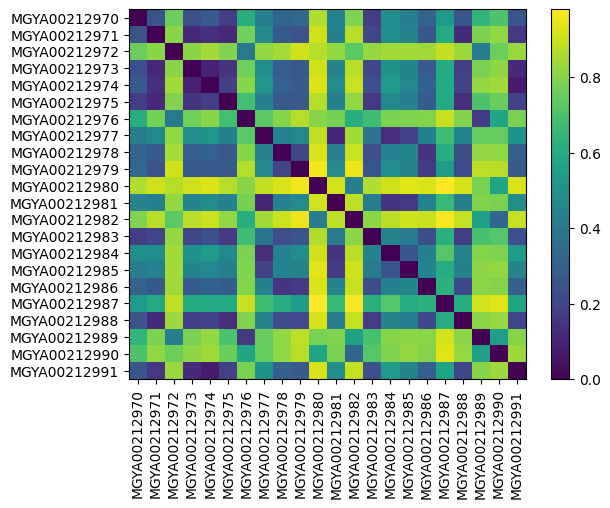

In [42]:
from skbio.diversity import beta_diversity
sample_by_otu_df = count_df.pivot_table(columns=["OTU_ID"], index=["Sample_id"], values=["Count"], fill_value=0)
sample_list = sample_by_otu_df.reset_index()['Sample_id']
matrix_data = sample_by_otu_df.values
bc_dm = beta_diversity('braycurtis', matrix_data, sample_list)
bc_dm


In [23]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)

0.10.3


In [24]:
matrix_data = sample_by_otu_df.values
counts = matrix_data
adata = ad.AnnData(counts)
adata

AnnData object with n_obs × n_vars = 22 × 759

In [25]:
sample_list = sample_by_otu_df.reset_index()['Sample_id']
adata.obs_names = sample_list
adata.var_names = sample_by_otu_df.columns.get_level_values(1)
print(adata.obs_names[:10])

Index(['ERR204744', 'ERR204745', 'ERR204746', 'ERR204747', 'ERR204748',
       'ERR204749', 'ERR204750', 'ERR204751', 'ERR204752', 'ERR204753'],
      dtype='object', name='Sample_id')


In [56]:
adata.var_names = sample_by_otu_df.columns.get_level_values(1)
adata.obs_names = sample_list


In [27]:
adata.obs = adata.obs.merge(sample_analysis_df, left_on='Sample_id', right_on="relationships.run.data.id")

In [32]:
adata.var = adata.var.merge(otu_df, left_on="OTU_ID", right_on="OTU_ID")

In [34]:
adata.write("../metagenomics/tmp/MGYS00002998_anndata")

In [37]:
adata

AnnData object with n_obs × n_vars = 22 × 759
    obs: 'sample_id', 'study', 'environment', 'biome_relationship', 'sample_desc', 'relationships.run.data.id', 'id', 'relationships.sample.data.id'
    var: 'OTU_ID', 'Domain', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'taxonomy'

In [62]:
sc.tl.pca(adata, svd_solver='arpack')

AttributeError: PathCollection.set() got an unexpected keyword argument 'colormap'

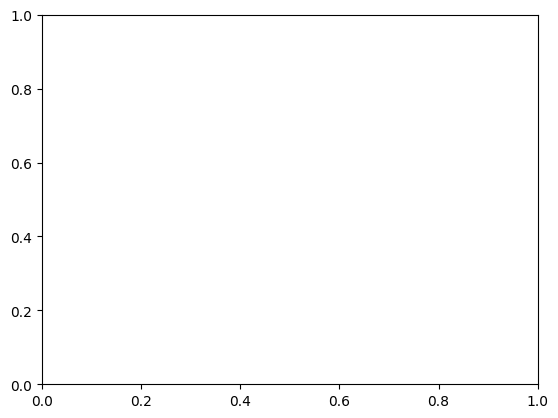

In [64]:
sc.pl.pca(adata, colormap='viridis')


TypeError: 'value' must be an instance of str or bytes, not a float

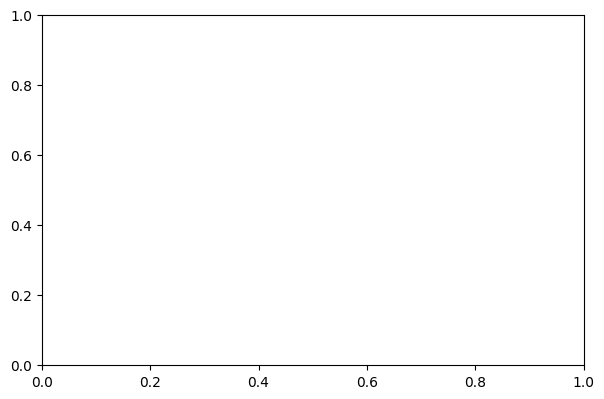

In [48]:
sc.pl.scatter(adata, x='Species', y='Genus')

In [61]:
adata.var_names

Index([   199,   3611,   3616,   3689,   4370,   4511,   4843,   5198,   5378,
         5592,
       ...
       262985, 263057, 263087, 263481, 263494, 263805, 264712, 264947, 265138,
       265348],
      dtype='int64', name='OTU_ID', length=759)

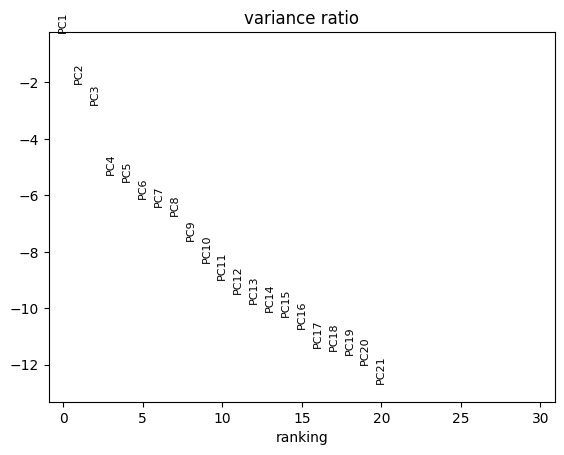

In [49]:
sc.pl.pca_variance_ratio(adata, log=True)


KeyError: 'Could not find key Species in .var_names or .obs.columns.'

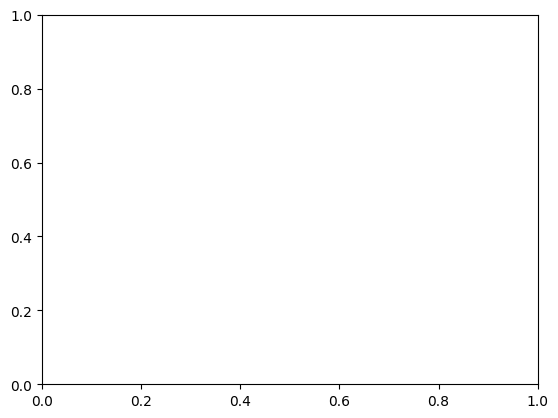

In [50]:
sc.pl.pca(adata, color='Species')

In [51]:
adata.obs.columns

Index(['sample_id', 'study', 'environment', 'biome_relationship',
       'sample_desc', 'relationships.run.data.id', 'id',
       'relationships.sample.data.id'],
      dtype='object')

In [52]:
adata.var_names

RangeIndex(start=0, stop=759, step=1)

In [57]:
adata.to_df()

OTU_ID,199,3611,3616,3689,4370,4511,4843,5198,5378,5592,...,262985,263057,263087,263481,263494,263805,264712,264947,265138,265348
Sample_id,,,,,,,,,,,,,,,,,,,,,
ERR204744,4.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,4.0,45.0,3.0,0.0,1.0,0.0,0.0,0.0
ERR204745,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,1000.0,2.0,0.0,2.0,0.0,0.0,0.0
ERR204746,0.0,0.0,0.0,12.0,0.0,0.0,7.0,0.0,1.0,0.0,...,2.0,0.0,0.0,460.0,1.0,0.0,0.0,0.0,0.0,0.0
ERR204747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ERR204748,26.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,285.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR204749,1.0,0.0,0.0,8.0,4.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1167.0,0.0,0.0,6.0,0.0,0.0,3.0
ERR204750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
ERR204751,0.0,0.0,2.0,8.0,0.0,0.0,4.0,0.0,0.0,0.0,...,2.0,2.0,1.0,760.0,1.0,0.0,10.0,0.0,0.0,0.0
ERR204752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
